<a href="https://colab.research.google.com/github/mar-wong/JupyterLab_Labor/blob/main/differential_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Solving ordinary differential equations (ODE) using numerical algorithms
Suppose we have the simple differential equation:
$$\dot{y}=y$$
then we can analytically get the function for y:
$$y=e^t$$

However, it is not always this easy to find a solution for an ODE analytically. Therefore numerical algorithms are being used to approximate solutions to ODE's.

## Euler's method
One of the simplest numerical algorithms for solving ODE's is the Euler's method. It requires an initial point $(t_0,y_0)$ of the  function $f(t,y)$. $\Delta x$ is a hyperparameter that determines the accuracy of the approximation (lower is more accurate).

If we have a differential equation of the form:
$$
\dot{y}=f(t,y)
$$

Then we can approximate the solution using:
$$
y_{n+1}=y_n+f(t_n,y_n) \cdot Δx
$$

Here is an example implementation that approximates the value of the solution of the ODE at $t=1$ which should be $e^1\approx2.718...$

In [ ]:
# Function representing the right-hand side of the differential equation
function = lambda t, y: y

# Hyperparameter determining the accuracy of the approximation
dx = 0.000001

# Initial point of the function
t_0, y_0 = 0, 1

# Variables for approximating the solution to the ODE
t_n = t_0
y_n = y_0

# Target time for the solution of the ODE
t_target = 1

for i in range(int(np.ceil(abs(t_target)/dx))):
  y_n = y_n + function(t_n, y_n) * dx

print(y_n)

2.7182804693194718


Here is a visualization of the implementation using increasingly smaller values for $\Delta x$:

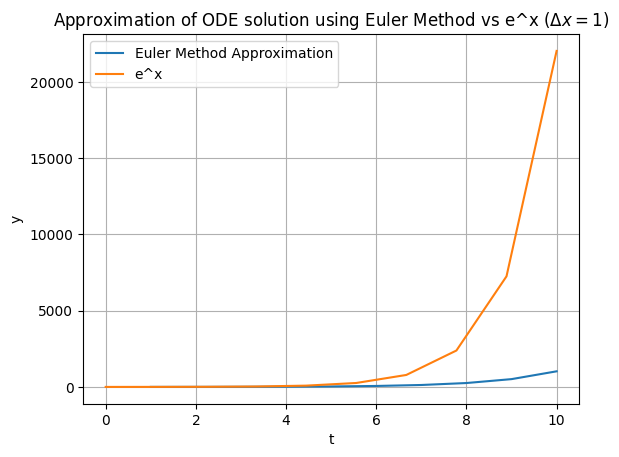

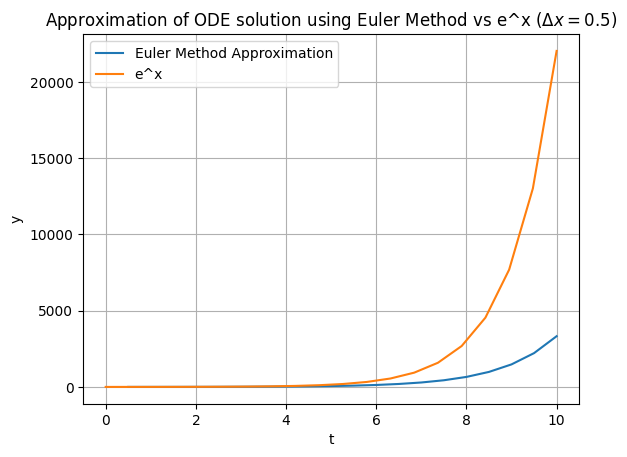

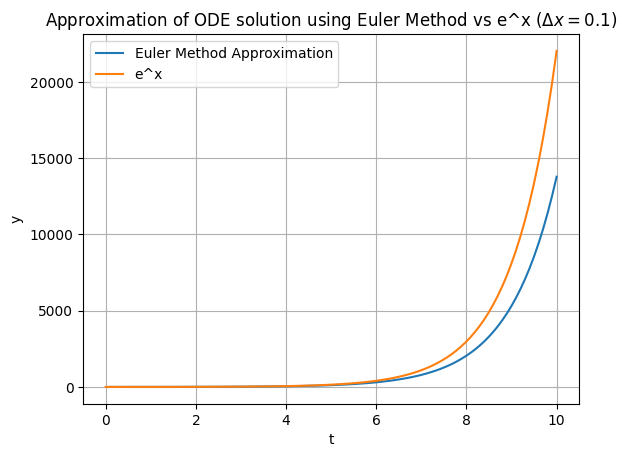

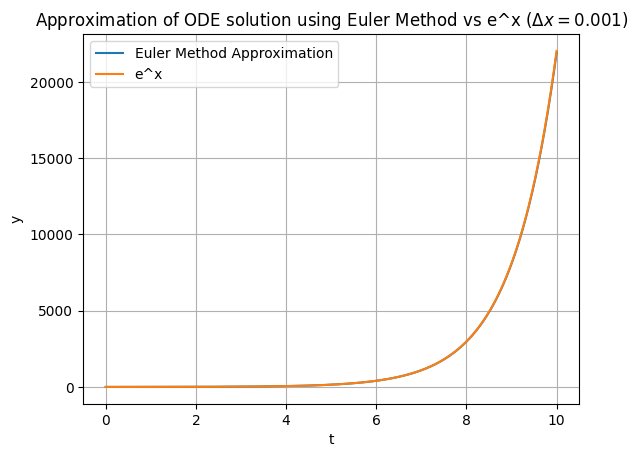

In [ ]:
def show_approx_plot(dx):
  # Function representing the right-hand side of the differential equation
  function = lambda t, y: y

  # Initial point of the function
  t_0, y_0 = 0, 1

  # Variables for approximating the solution to the ODE
  t_n = t_0
  y_n = y_0

  # Target time for the solution of the ODE
  t_target = 10

  # List to store (t_n, y_n) pairs for the Euler method approximation
  data = []

  for i in range(int(np.ceil(abs(t_target)/dx))):
      y_n = y_n + function(t_n, y_n) * dx
      t_n += dx
      data.append((t_n, y_n))

  # Convert the list to a Pandas DataFrame
  df = pd.DataFrame(data, columns=['t', 'y'])

  # Compute values of e^x for the same range of t values
  t_values = np.linspace(t_0, t_target, len(df))
  e_values = np.exp(t_values)

  # Plotting the Euler method approximation and e^x on the same graph
  plt.plot(df['t'], df['y'], label='Euler Method Approximation')
  plt.plot(t_values, e_values, label='e^x')
  plt.xlabel('t')
  plt.ylabel('y')
  plt.title(f'Approximation of ODE solution using Euler Method vs e^x ($\Delta x = {dx}$)')
  plt.legend()
  plt.grid(True)
  plt.show()

for dx in [1, 0.5, 0.1, 0.001]:
  show_approx_plot(dx)

## Runge-Kutta methods
Runge-Kutta methods are a family of iterative methods to solve ODE numerically, which includes Euler's method. The simplicity of Euler's method comes with the downside of a linear rate of convergence. I.e. when doubling hyperparameter $\Delta x$ the accuracy doubles as well. However, there are other methods that converge faster e.g. Heun's method or RK4.


## Heun's method
Heun's method is a two-stage Runge-Katta method i.e. it calculates two slopes in the interval $\left[t_n , t_{n+1}\right]$ and takes a weighted average of these to predict the next value $y_{n+1}$. In the case of Heun's method it first calculates the intermediate value $\tilde{y}_{n+1}$ using the slope at $(t_n,y_n)$ and then the final approximation $y_{n+1}$ by averaging the slope at $(t_n,y_n)$ and $(\tilde{t}_{n+1},\tilde{y}_{n+1})$.

$$
\tilde{y}_{n+1}=y_i+\Delta x \cdot f(t_n,y_n)
$$
$$
y_{n+1}=y_i+\Delta x \cdot \frac{ f(t_n,y_n) + f(t_{n+1},\tilde{y}_{n+1}) }{2}
$$

This minimizes the accumulated error by making a more accurate prediction for $y_{n+1}$ and hence making the prediction for $y_{n+2}$ more accurate etc.

Here is an example implementation that demonstrates how Heun's method converges faster to the correct solution:


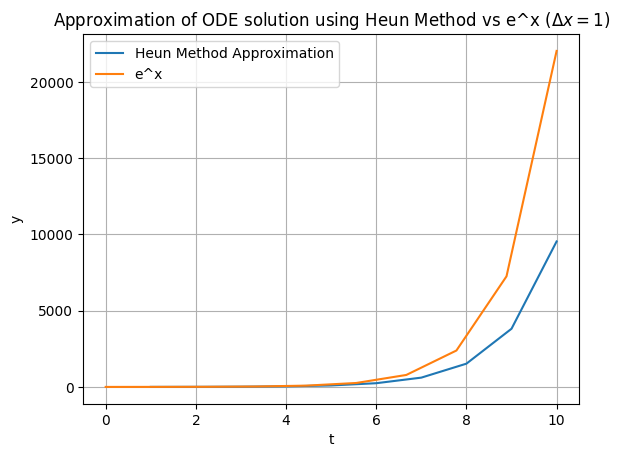

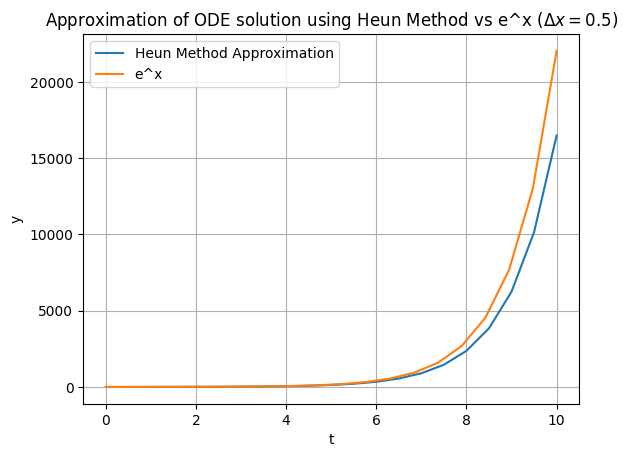

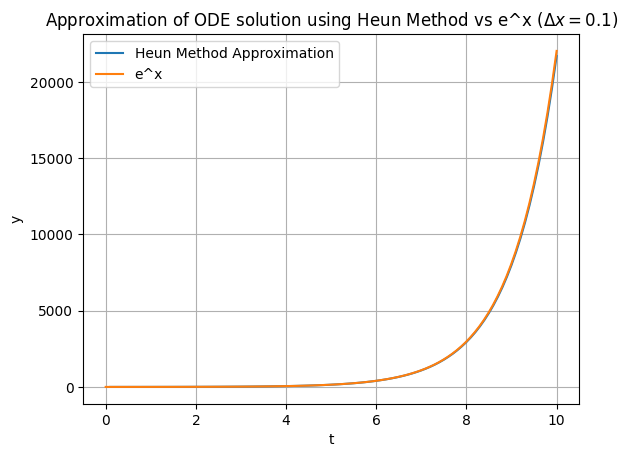

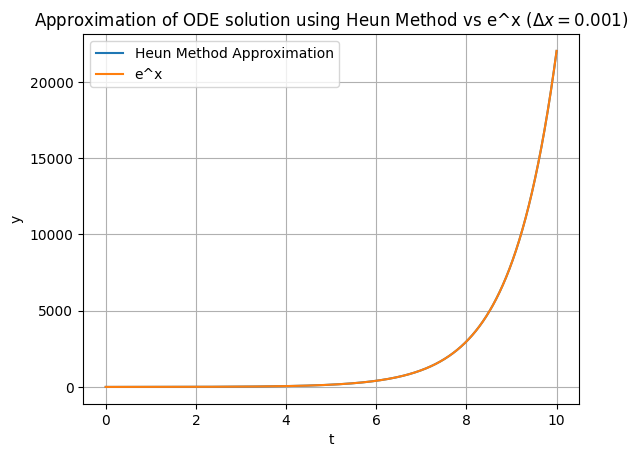

In [ ]:
def show_approx_plot(dx):
  # Function representing the right-hand side of the differential equation
  function = lambda t, y: y

  # Initial point of the function
  t_0, y_0 = 0, 1

  # Variables for approximating the solution to the ODE
  t_n = t_0
  y_n = y_0

  # Target time for the solution of the ODE
  t_target = 10

  # List to store (t_n, y_n) pairs for the Euler method approximation
  data = []

  for i in range(int(np.ceil(abs(t_target)/dx))):
      y_tilde_n = y_n + function(t_n, y_n) * dx
      y_n = y_n + ( function(t_n, y_n) + function(t_n+dx, y_tilde_n) ) * dx / 2
      t_n += dx
      data.append((t_n, y_n))

  # Convert the list to a Pandas DataFrame
  df = pd.DataFrame(data, columns=['t', 'y'])

  # Compute values of e^x for the same range of t values
  t_values = np.linspace(t_0, t_target, len(df))
  e_values = np.exp(t_values)

  # Plotting the Euler method approximation and e^x on the same graph
  plt.plot(df['t'], df['y'], label='Heun Method Approximation')
  plt.plot(t_values, e_values, label='e^x')
  plt.xlabel('t')
  plt.ylabel('y')
  plt.title(f'Approximation of ODE solution using Heun Method vs e^x ($\Delta x = {dx}$)')
  plt.legend()
  plt.grid(True)
  plt.show()

for dx in [1, 0.5, 0.1, 0.001]:
  show_approx_plot(dx)

## RK4 Method
The most commonly used Runge-Kutta method is the RK4 method and as the name already suggests is a four-stage Runge-Kutta method.

$$
\begin{align}
k_1 &= \Delta x \cdot f(t_n,y_n)         \\
k_2 &= \Delta x \cdot f(t_n + \frac{\Delta x}{2},y_n+ \frac{k_1}{2}) \\
k_3 &= \Delta x \cdot f(t_n + \frac{\Delta x}{2},y_n+ \frac{k_2}{2}) \\
k_4 &= \Delta x \cdot f(t_n + \Delta x,y_n+k_3) \\
y_{n+1}&=y_n+\frac{k_1 + 2 k_2 + 2 k_3 + k_4}{6}
\end{align}
$$

Here is an example implementation that demonstrates how the RK4 method converges even faster to the correct solution:

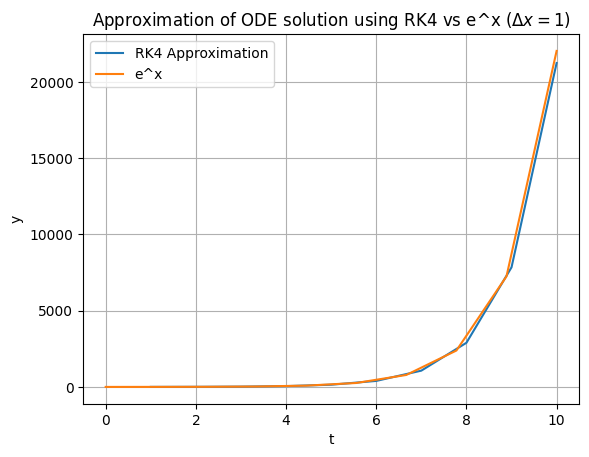

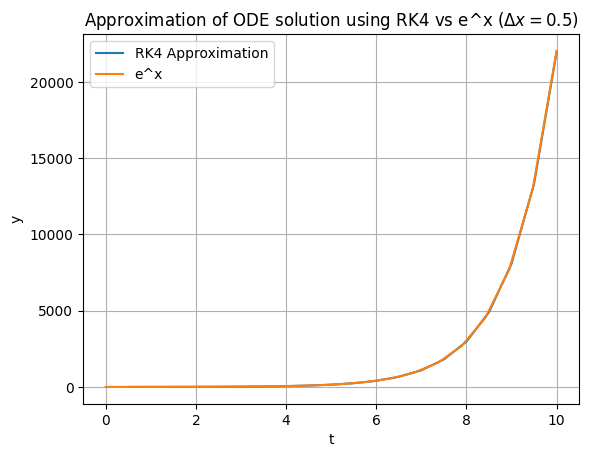

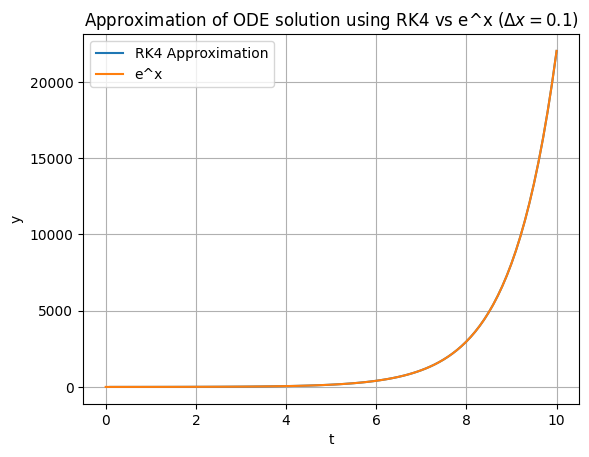

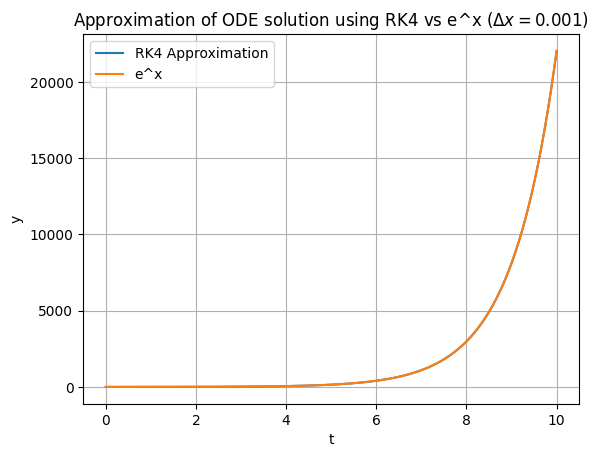

In [ ]:
def show_approx_plot(dx):
  # Function representing the right-hand side of the differential equation
  function = lambda t, y: y

  # Initial point of the function
  t_0, y_0 = 0, 1

  # Variables for approximating the solution to the ODE
  t_n = t_0
  y_n = y_0

  # Target time for the solution of the ODE
  t_target = 10

  # List to store (t_n, y_n) pairs for the Euler method approximation
  data = []

  for i in range(int(np.ceil(abs(t_target)/dx))):
      k_1 = dx * function(t_n, y_n)
      k_2 = dx * function(t_n + dx/2, y_n + k_1/2)
      k_3 = dx * function(t_n + dx/2, y_n + k_2/2)
      k_4 = dx * function(t_n + dx, y_n + k_3)
      y_n = y_n + (k_1+2*k_2+2*k_3+k_4)/6
      t_n += dx
      data.append((t_n, y_n))

  # Convert the list to a Pandas DataFrame
  df = pd.DataFrame(data, columns=['t', 'y'])

  # Compute values of e^x for the same range of t values
  t_values = np.linspace(t_0, t_target, len(df))
  e_values = np.exp(t_values)

  # Plotting the Euler method approximation and e^x on the same graph
  plt.plot(df['t'], df['y'], label='RK4 Approximation')
  plt.plot(t_values, e_values, label='e^x')
  plt.xlabel('t')
  plt.ylabel('y')
  plt.title(f'Approximation of ODE solution using RK4 vs e^x ($\Delta x = {dx}$)')
  plt.legend()
  plt.grid(True)
  plt.show()

for dx in [1, 0.5, 0.1, 0.001]:
  show_approx_plot(dx)

## SciPy
To solve ODE numerically it is recommended to use industry-proven libraries rather than implementing the algorithms on your own. An example would be to use [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy-integrate-solve-ivp).

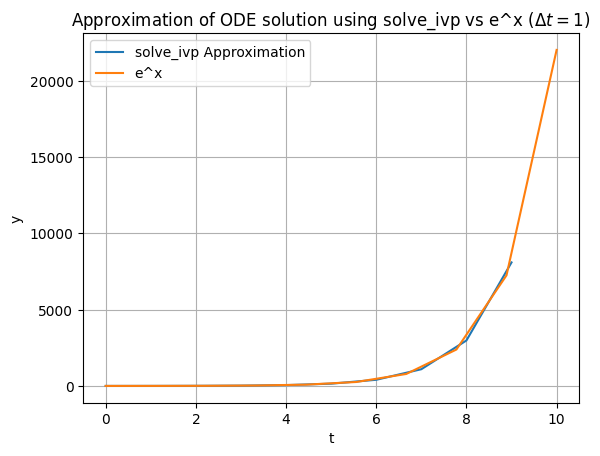

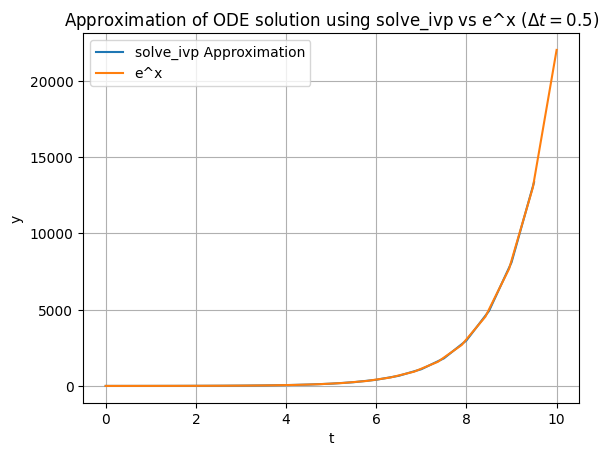

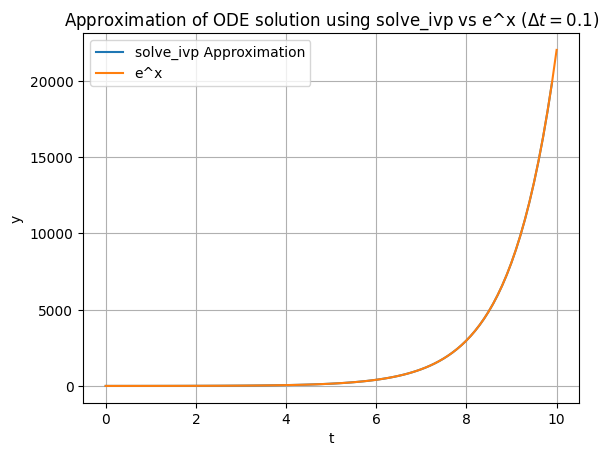

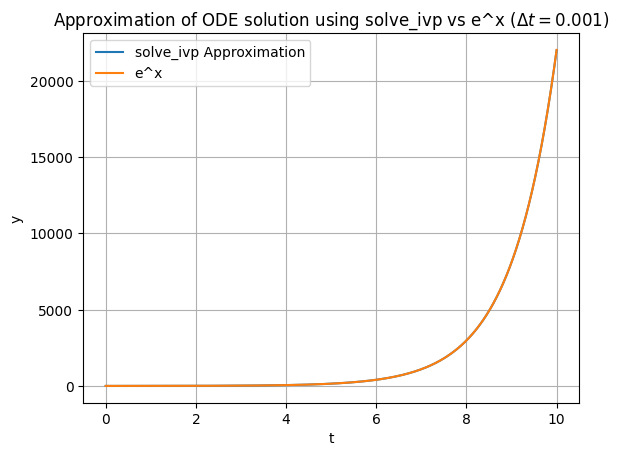

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def solve_ivp_plot(dx):
    # Define the right-hand side function for the ODE
    function = lambda t, y: y

    # Initial condition
    y0 = [1]

    # Time span
    t_span = [0, 10]

    # Solve the ODE using solve_ivp
    sol = solve_ivp(function, t_span, y0, t_eval=np.arange(0, 10, dx))

    # Compute values of e^x for the same range of t values
    t_values = np.linspace(0, 10, len(sol.t))
    e_values = np.exp(t_values)

    # Plotting the solve_ivp approximation and e^x on the same graph
    plt.plot(sol.t, sol.y[0], label='solve_ivp Approximation')
    plt.plot(t_values, e_values, label='e^x')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title(f'Approximation of ODE solution using solve_ivp vs e^x ($\Delta t = {dx}$)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call solve_ivp_plot for different values of dt
for dt in [1, 0.5, 0.1, 0.001]:
    solve_ivp_plot(dt)

# Sources
- https://en.wikipedia.org/wiki/Euler_method
- https://en.wikipedia.org/wiki/Heun%27s_method
- https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
- https://math.okstate.edu/people/yqwang/teaching/math4513_fall11/Notes/rungekutta.pdf

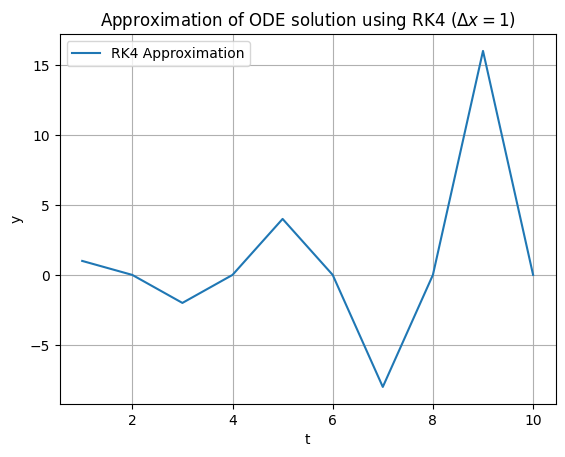

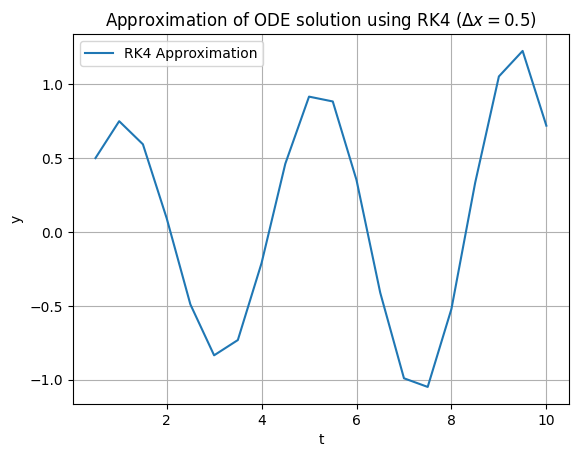

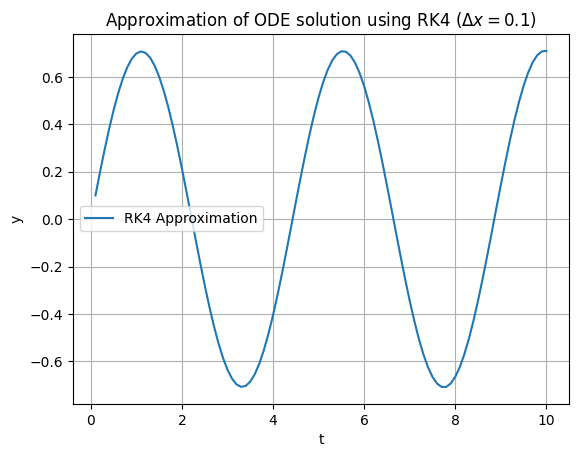

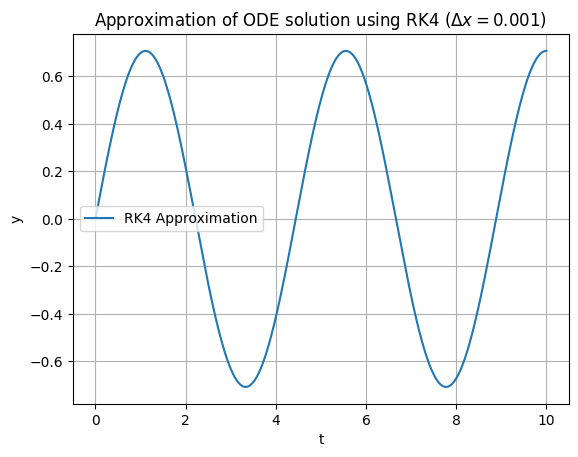

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def show_approx_plot(dx):
    # Function representing the right-hand side of the differential equation
    function = lambda t, y: np.array([y[1], -2*y[0]])

    # Initial point of the function
    t_0, y_0 = 0, np.array([0, 1])  # Initial condition for y and y'

    # Variables for approximating the solution to the ODE
    t_n = t_0
    y_n = y_0

    # Target time for the solution of the ODE
    t_target = 10

    # List to store (t_n, y_n) pairs for the RK4 approximation
    data = []

    for i in range(int(np.ceil(abs(t_target) / dx))):
        k_1 = dx * function(t_n, y_n)
        k_2 = dx * function(t_n + dx, y_n + k_1)
        y_n = y_n + (k_1 + k_2) / 2
        t_n += dx
        data.append((t_n, y_n[0]))

    # Convert the list to a Pandas DataFrame
    df = pd.DataFrame(data, columns=['t', 'y'])

    # Plotting the RK4 approximation and the analytical solution
    t_values = np.linspace(t_0, t_target, len(df))
    plt.plot(df['t'], df['y'], label='RK4 Approximation')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title(f'Approximation of ODE solution using RK4 ($\Delta x = {dx}$)')
    plt.legend()
    plt.grid(True)
    plt.show()

for dx in [1, 0.5, 0.1, 0.001]:
    show_approx_plot(dx)
